In [1]:
from models import *
from static import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Simulate One Model

In [2]:
steps = 200
model = abmodel(static_map_v0(), all_agents())
model.run_model(steps)
model_results = model.datacollector.get_model_vars_dataframe()
model_results.head(10)

#1 Check succeed
#2 Check succeed
#3 Check succeed
#2 Check succeed
A
#3 Check succeed
A
#4 Check succeed
#3 Check succeed
#4 Check succeed
#3 Check succeed
A
#4 Check succeed
A
A
A
A
A
B
A
A
A
A


Step  (Corporate V0)  Trade Volume (Corporate V0)  Price (Corporate V0)  \
0     1             200                           56              0.731476   
1     2             200                           26              0.543657   
2     3             200                            2              0.380000   
3     4             200                            0                   NaN   
4     5             200                            2              0.370000   
5     6             200                            0                   NaN   
6     7             200                            3              0.360000   
7     8             200                            3              0.460013   
8     9             200                            3              0.350000   
9    10             200                            1              0.330000   

   (Central Bank V0)      interest_rate  \
0                  2  (0.0025, -0.0025)   
1                  2  (0.0025, -0.0025)   
2                  2  (0.0025, -0.0025)   
3                  2  (0.0025, -0.0025)   
4                  2  (0.0025, -0.0025)   
5                  2  (0.0025, -0.0025)   
6                  2  (0.0025, -0.0025)   
7                  2  (0.0025, -0.0025)   
8                  2  (0.0025, -0.0025)   
9                  2  (0.0025, -0.0025)   

                                   inflation_rate  \
0       (0.0383591986357335, 0.00870935955071573)   
1     (0.03225978841155076, 0.005508503920920548)   
2     (0.02839104506698264, 0.002050542049193511)   
3   (0.026335818113811957, 0.0016831556866823876)   
4     (0.0330186566827218, 0.0012344021354762096)   
5    (0.03896575396542972, -0.001068299762415229)   
6    (0.029299325083128058, 0.002856399812669183)   
7   (0.026937019264270144, 0.0026159405786340215)   
8    (0.024934233279106623, 0.004621185801853443)   
9  (0.03131627451963975, -0.00043964785103630787)   

                                     growth_rate  \
0   (0.029134646505383333, 0.008414312806252926)   
1   (0.037769454477328955, 0.006535492410725376)   
2  (0.034879178877760326, 0.0031421190688814132)   
3    (0.040765278526690756, 0.01994654161760697)   
4      (0.0225355260783394, 0.01563594322515626)   
5    (0.031895116686202395, 0.01920964292645546)   
6   (0.038082525339741415, 0.016455939452466442)   
7    (0.030790032249484643, 0.01254605421943408)   
8   (0.033948497924779705, 0.014394687830446829)   
9     (0.039455650780781594, 0.0181156181069136)   

               target_interest_rate target_inflation_rate  ...  \
0  (0.01625, 0.0035000000000000005)         (0.02, 0.015)  ...   
1     (0.047106121206291915, -0.01)         (0.02, 0.015)  ...   
2     (0.042274409855990625, -0.01)         (0.02, 0.015)  ...   
3      (0.03502615703935412, -0.01)         (0.02, 0.015)  ...   
4     (0.034886366434063315, -0.01)         (0.02, 0.015)  ...   
5     (0.035795748063252406, -0.01)         (0.02, 0.015)  ...   
6     (0.049396189291245785, -0.01)         (0.02, 0.015)  ...   
7     (0.037990250294562794, -0.01)         (0.02, 0.015)  ...   
8     (0.030800545021147537, -0.01)         (0.02, 0.015)  ...   
9     (0.029375598881049788, -0.01)         (0.02, 0.015)  ...   

  Trade Volume (Local Bank) Price (Local Bank) Hedge Volume (Local Bank)  \
0                        56           0.731476                        16   
1                        26           0.543657                        19   
2                         2           0.380000                         4   
3                         0                NaN                         0   
4                         2           0.370000                         1   
5                         0                NaN                         1   
6                         3           0.360000                         0   
7                         3           0.460013                         2   
8                         3           0.350000                         1   
9                         

### Corporate Details

In [3]:
model.corporate_details.by_agent(model.corporate_details.all_ids()[0]).head(10)

Step  Position  Currency A  Currency B              Quotes Traded Price  \
0     0  (13, 33)      94.000       72.00  (None, None, None)           []   
1     1  (12, 33)      93.995       68.01   (short, 0.96, 41)           []   
2     2  (12, 32)      93.990       64.02   (short, 0.91, 43)           []   
3     3  (11, 32)      93.985       60.03   (short, 0.86, 45)           []   
4     4  (11, 32)      91.980       56.04   (short, 0.82, 45)           []   
5     5  (11, 32)      89.975       52.05   (short, 0.79, 46)           []   
6     6  (11, 32)      87.970       48.06   (short, 0.75, 46)           []   
7     7  (11, 32)      85.965       44.07   (short, 0.71, 47)           []   
8     8  (12, 32)      83.960       40.08   (short, 0.68, 48)           []   
9     9  (12, 32)      81.955       36.09   (short, 0.64, 48)           []   

  Traded Amount Traded with  Firm Value  
0            []          []  166.000000  
1            []          []  202.811000  
2            []          []  213.653551  
3            []          []  206.190607  
4            []          []  198.722857  
5            []          []  190.071154  
6            []          []  181.290388  
7            []          []  173.232327  
8            []          []  165.755918  
9            []          []  156.367371

In [4]:
model.corporate_details.by_step(steps)

Agent ID  Position  Currency A  Currency B              Quotes  \
0        4656  (20, 23)     16.6550     36.4650  (None, None, None)   
1        4758  (27, 19)     52.6550    108.1450  (None, None, None)   
2        4798  (12, 74)     15.3100     16.0350     (long, 0.08, 1)   
3        4896  (10, 76)     27.4950     16.8200     (long, 0.41, 3)   
4        4908   (8, 74)     36.2725     14.6900     (long, 0.55, 3)   
..        ...       ...         ...         ...                 ...   
195      5276   (3, 35)     68.9925    343.6025  (None, None, None)   
196      5277   (5, 28)    392.9925    257.9850  (short, 0.74, 193)   
197      5278  (16, 10)    385.9850    254.9700  (short, 0.74, 189)   
198      5279   (9, 40)     77.9925    387.6325  (None, None, None)   
199      5280   (4, 27)    179.9850    113.9625   (short, 0.6, 108)   

    Traded Price Traded Amount Traded with  Firm Value  
0             []            []          []   81.194823  
1             []            []          []  244.062080  
2             []            []          []   43.690531  
3             []            []          []   57.264912  
4             []            []          []   62.272500  
..           ...           ...         ...         ...  
195           []            []          []  677.138518  
196           []            []          []  849.603119  
197           []            []          []  837.259336  
198           []            []          []  764.067721  
199           []            []          []  381.688540  

[200 rows x 9 columns]

### Bank Details

In [5]:
model.bank_details.all_ids()

[4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849]

In [6]:
model.bank_details.by_agent(model.bank_details.all_ids()[0]).tail(10)

Step Position  Currency A  Currency B Traded Price Traded Amount  \
56    56  (13, 3)      89.215       25.15       [0.53]          [-1]   
57    57  (13, 3)      80.675       22.16           []            []   
58    58  (13, 3)      71.045       19.65           []            []   
59    59  (13, 3)      63.985       16.94       [1.28]          [-1]   
60    60  (13, 3)      53.925       14.71           []            []   
61    61  (13, 3)      44.195       12.19           []            []   
62    62  (13, 3)      34.395        9.67           []            []   
63    63  (13, 3)      24.745        7.21       [0.53]          [-1]   
64    64  (13, 3)      14.685        5.44           []            []   
65    65  (13, 3)       6.625        2.23           []            []   

   Traded with Hedged Price Hedged Amount Hedged with  \
56      [4732]           []            []          []   
57          []           []            []          []   
58          []           []            []          []   
59      [4804]           []            []          []   
60          []           []            []          []   
61          []           []            []          []   
62          []           []            []          []   
63      [4705]           []            []          []   
64          []           []            []          []   
65          []           []            []          []   

                 Arbed Price      Arbed Amount                Arbed with  \
56              [0.48, 0.49]          [-1, -1]              [4850, 4850]   
57                        []                []                        []   
58                    [0.48]              [-1]                    [4851]   
59                        []                []                        []   
60  [0.41, 0.43, 0.45, 0.47]  [-1, -1, -1, -1]  [4851, 4851, 4851, 4851]   
61                    [0.47]              [-1]                    [4851]   
62                    [0.47]              [-1]                    [4850]   
63                        []                []                        []   
64    [0.54, 0.6, 0.5, 0.58]  [-1, -1, -1, -1]  [4851, 4851, 4850, 4850]   
65              [0.33, 0.45]          [-1, -1]              [4850, 4850]   

    Firm Value  
56  139.016980  
57  125.899490  
58  112.853511  
59   98.556429  
60   83.642172  
61   68.821263  
62   53.930354  
63   38.882255  
64   23.185000  
65   10.082364

In [7]:
model.bank_details.by_step(steps)

Agent ID  Position  Currency A  Currency B Traded Price Traded Amount  \
0      4845  (23, 44)   17652.725     9739.01           []            []   

  Traded with Hedged Price Hedged Amount Hedged with Arbed Price Arbed Amount  \
0          []           []            []          []          []           []   

  Arbed with    Firm Value  
0         []  34889.910841

### Interbank Limit Order Book

In [8]:
model.bank_details.lob_plot(steps)

In [9]:
model.bank_details.top_of_book_plot()

In [10]:
model.bank_details.price_plot()

### Arbitrager Details

In [11]:
model.arbitrager_details.all_ids()

[4850, 4851, 4852, 4853]

In [12]:
model.arbitrager_details.by_agent(model.arbitrager_details.all_ids()[0]).tail()

Step  Position  Currency A  Currency B Traded Price Traded Amount  \
196   196  (24, 15)         100      114.14           []            []   
197   197  (24, 15)         100      114.14           []            []   
198   198  (24, 15)         100      114.14           []            []   
199   199  (24, 15)         100      114.14           []            []   
200   200  (24, 15)         100      114.14           []            []   

    Traded with  Firm Value  
196          []  278.343750  
197          []  279.748031  
198          []  300.245614  
199          []  302.017699  
200          []  302.017699

In [13]:
model.arbitrager_details.by_step(steps)

Agent ID  Position  Currency A  Currency B Traded Price Traded Amount  \
0      4850  (24, 15)         100      114.14           []            []   
1      4851  (24, 35)         100      121.05           []            []   
2      4852  (24, 50)         100      120.06           []            []   
3      4853  (24, 75)         100      108.07           []            []   

  Traded with  Firm Value  
0          []  302.017699  
1          []  314.247788  
2          []  312.495575  
3          []  291.274336

### Speculator Details

In [14]:
model.speculator_details.all_ids()

[4856, 4854, 4855]

In [15]:
model.speculator_details.by_agent(model.speculator_details.all_ids()[0])[:50]

Step  Position  Currency A  Currency B              Quotes Traded Price  \
0      0  (14, 46)   80.000000   90.000000  (None, None, None)           []   
1      1  (14, 46)   80.000000   90.000000  (None, None, None)           []   
2      2  (14, 46)   80.000000   90.000000  (None, None, None)           []   
3      3  (14, 46)   80.000000   90.000000  (None, None, None)           []   
4      4  (14, 46)   80.000000   90.000000  (None, None, None)           []   
5      5  (14, 46)   80.000000   90.000000  (None, None, None)           []   
6      6  (14, 46)   80.000000   90.000000  (None, None, None)           []   
7      7  (14, 46)   80.000000   90.000000  (None, None, None)           []   
8      8  (14, 46)   80.000000   90.000000  (None, None, None)           []   
9      9  (14, 46)   80.000000   90.000000  (None, None, None)           []   
10    10  (14, 46)   80.000000   90.000000  (None, None, None)           []   
11    11  (14, 46)   80.000000   90.000000  (None, None, None)           []   
12    12  (14, 46)   80.000000   90.000000  (None, None, None)           []   
13    13  (14, 46)   80.000000   90.000000  (None, None, None)           []   
14    14  (14, 46)   80.000000   90.000000  (None, None, None)           []   
15    15  (14, 46)   80.000000   90.000000  (None, None, None)           []   
16    16  (14, 46)   80.000000   90.000000  (None, None, None)           []   
17    17  (14, 46)   80.000000   90.000000  (None, None, None)           []   
18    18  (14, 46)   80.000000   90.000000  (None, None, None)           []   
19    19  (14, 46)   80.000000   90.000000  (None, None, None)           []   
20    20  (14, 46)   80.000000   90.000000  (None, None, None)           []   
21    21  (14, 46)   80.000000   90.000000  (None, None, None)           []   
22    22  (14, 46)   80.000000   90.000000  (None, None, None)           []   
23    23  (14, 46)   80.000000   90.000000  (None, None, None)           []   
24    24  (14, 46)   80.000000   90.000000  (None, None, None)           []   
25    25  (14, 46)   80.000000   90.000000  (None, None, None)           []   
26    26  (14, 46)   80.000000   90.000000  (None, None, None)           []   
27    27  (14, 46)   80.000000   90.000000  (None, None, None)           []   
28    28  (14, 46)   80.000000   90.000000  (None, None, None)           []   
29    29  (14, 46)   80.000000   90.000000  (None, None, None)           []   
30    30  (14, 46)   80.000000   90.000000  (None, None, None)           []   
31    31  (14, 46)   80.000000   90.000000  (None, None, None)           []   
32    32  (14, 46)   80.000000   90.000000  (None, None, None)           []   
33    33  (14, 46)   80.000000   90.000000  (None, None, None)           []   
34    34  (14, 46)   80.000000   90.000000  (None, None, None)           []   
35    35  (14, 46)   80.000000   90.000000  (None, None, None)           []   
36    36  (14, 46)   80.000000   90.000000  (None, None, None)           []   
37    37  (14, 46)   80.000000   90.000000  (None, None, None)           []   
38    38  (14, 46)   80.000000   90.000000  (None, None, None)           []   
39    39  (14, 46)   80.000000   90.000000  (None, None, None)           []   
40    40  (14, 46)   80.000000   90.000000  (None, None, None)           []   
41    41  (14, 46)   80.000000   90.000000  (None, None, None)           []   
42    42  (14, 46)   80.000000   90.000000    (long, 0.31, 40)           []   
43    43  (14, 46)   80.001587   90.000139    (long, 0.45, 40)           []   
44    44  (14, 46)   80.003175   90.000278    (long, 0.44, 40)           []   
45    45  (14, 46)   80.004762   90.000417    (long, 0.43, 40)           []   
46    46  (14, 46)   80.006349   90.000556    (long, 0.44, 40)           []   
47    47  (14, 46)   80.007937   90.000694    (long, 0.48, 40)           []   
48    48  (14, 46)  120.009524   67.600833    (long, 0.56, 40)       [0.56]   
49    49  (14, 46)  120.011111   67.600972  (None, Non

In [16]:
model.speculator_details.by_step(steps)

Agent ID  Position  Currency A  Currency B              Quotes  \
0      4854  (15, 46)    6.000000  116.100000  (None, None, None)   
1      4855  (15, 70)  100.000000   51.640000  (None, None, None)   
2      4856  (14, 46)  122.497718  -28.222946  (None, None, None)   

  Traded Price Traded Amount Traded with  Firm Value  
0           []            []          []  211.486726  
1           []            []          []  191.398230  
2           []            []          []   72.545601

### Central Bank Detail

In [17]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def plot_central_bank(model_results):

    steps_data = model_results['Step'].values
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)
    inflation_rate_1_data, inflation_rate_2_data = zip(*model_results['inflation_rate'].values)

    growth_rate_1_data, growth_rate_2_data = zip(*model_results['growth_rate'].values)
    target_interest_rate_1_data, target_interest_rate_2_data = zip(*model_results['target_interest_rate'].values)
    target_inflation_rate_1_data, target_inflation_rate_2_data = zip(*model_results['target_inflation_rate'].values)


    fig = make_subplots(rows = 2, cols = 2, subplot_titles=['Central Bank 1', 'Central Bank 2'])
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    inflation_rate_1 = go.Scatter(x = steps_data, y = inflation_rate_1_data, name = 'Inflation Rate(1)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_1 = go.Scatter(x = steps_data, y = growth_rate_1_data, name = 'Growth Rate(1)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green'))
    # target_interest_rate_1 = go.Scatter(x = steps_data, y = target_interest_rate_1_data, name = 'target interest rate (1)',  line = dict(color = 'red'))

    inflation_rate_2 = go.Scatter(x = steps_data, y = inflation_rate_2_data, name = 'Inflation Rate(2)', mode = 'lines', line = dict(color = 'blue'))
    growth_rate_2 = go.Scatter(x = steps_data, y = growth_rate_2_data, name = 'Growth Rate(2)', mode = 'lines', line = dict(color = 'black'))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'green'))
    # target_interest_rate_2 = go.Scatter(x = steps_data, y = target_interest_rate_2_data, name = 'target interest rate (2)',  line = dict(color = 'red'))


    fig.add_trace(inflation_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_1, row = 2, col = 1)
    fig.add_trace(growth_rate_1, row = 2, col = 1)
    # fig.add_trace(target_interest_rate_1, row = 1, col = 1)

    fig.add_trace(inflation_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 1, col = 2)
    fig.add_trace(interest_rate_2, row = 2, col = 2)
    fig.add_trace(growth_rate_2, row = 2, col = 2)
    # fig.add_trace(target_interest_rate_2, row = 1, col = 2)

    fig.update_layout(title_text = 'Central Bank Agent Behavior and Macroeconomics', showlegend=True)

    fig.update_layout(template = temp,
                      hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 100, b = 40),
                      height = 800, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


plot_central_bank(model_results)

### Agent-Based Map of Resources

In [18]:
import plotly.express as px
import plotly.graph_objs as go

def plot_map(model):

    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b

    fig = px.imshow(world_map, color_continuous_scale='dense')
    temp = dict(layout = go.Layout(font=dict(family="Franklin Gothic", size = 12)))

    fig.update_layout(template = temp,
                    title_text = 'Overall Map Layout - Mimic US and Japan',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 100, b = 20),
                    height = 500, 
                    width = 800, 
                    showlegend = True, 
                    legend = dict(yanchor = "top", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_map(model)

### Visualize How Agents Move 

In [19]:
def built_agent_position_df(model):

    agent_position_df = pd.DataFrame()

    for i in range(steps):

        # corporations
        pos_corps = pd.DataFrame(model.corporate_details.agent_pos[i], index = model.corporate_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_corps['steps'] = i
        pos_corps['agent_type'] = 'corps'

        # banks 
        pos_banks = pd.DataFrame(model.bank_details.agent_pos[i], index = model.bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        pos_banks['steps'] = i
        pos_banks['agent_type'] = 'banks'

        # international banks
        #pos_international_banks = pd.DataFrame(model.international_bank_details.agent_pos[i], index = model.international_bank_details.agent_id[i], columns = ["y", "x"]).reset_index(names = 'agent_id')
        #pos_international_banks['steps'] = i
        #pos_international_banks['agent_type'] = 'international_banks'


        # aggregate position df
        #frames = [pos_corps, pos_banks, pos_international_banks]
        frames = [pos_corps, pos_banks]
        all_position = pd.concat(frames)
        
        if i == 0:
            agent_position_df  = all_position
        
        else:
            frames = [agent_position_df, all_position]
            agent_position_df = pd.concat(frames)


    return agent_position_df


agent_position_df = built_agent_position_df(model)
agent_position_df

agent_id   y   x  steps agent_type
0        4640  13  33      0      corps
1        4641   3  26      0      corps
2        4642   8  35      0      corps
3        4643  14  50      0      corps
4        4644  19  13      0      corps
..        ...  ..  ..    ...        ...
198      5277   5  28    199      corps
199      5278  16  10    199      corps
200      5279   9  40    199      corps
201      5280   4  27    199      corps
0        4845  23  44    199      banks

[39794 rows x 5 columns]

In [20]:

def plot_agent_movement(model, agent_position_df):

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    map_a = model.static_map.currencyA_map_init
    map_b = model.static_map.currencyB_map_init
    world_map = map_a + map_b


    fig = px.scatter(agent_position_df, 
                    x = "x", 
                    y = "y", 
                    animation_frame = "steps", 
                    animation_group = "agent_id", 
                    color = "agent_type", 
                    color_discrete_sequence = ["black", "red", "green"],
                    hover_name = "agent_type")

    fig.add_heatmap(z = world_map, 
                    colorscale='dense', 
                    colorbar=dict(title='Level of Resources'))

    fig.update_yaxes(range = [agent_position_df['y'].max() + 5, agent_position_df['y'].min() - 5])

    fig.update_layout(template = temp,
                    title_text = 'Final Position of the Agents on The Map',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 500, 
                    width = 1000, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))
    return fig


plot_agent_movement(model, agent_position_df)

### Number of Agent during Simulation

In [21]:
def plot_agent_population(agent_position_df):

    number_of_agents_df = agent_position_df.groupby(['steps', 'agent_type'])['agent_id'].count().reset_index(name = 'Number of Agents')
    number_of_agents_corps = number_of_agents_df[number_of_agents_df['agent_type'] == 'corps']


    fig = make_subplots(rows=1, cols=1)
    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    corps = go.Scatter(y = number_of_agents_corps['Number of Agents'], name = 'Population')

    # fig.add_trace(banks)
    fig.add_trace(corps)

    fig.update_layout(template = temp,
                    title_text = 'Number of Corporation Agent',
                    hovermode = 'closest', 
                    margin = dict(l = 20, r = 20, t = 50, b = 20),
                    height = 300, 
                    width = 600, 
                    showlegend = True, 
                    legend = dict(yanchor = "bottom", 
                                    y = 0.99,
                                    xanchor = "left",
                                    x = 0.01))

    return fig


plot_agent_population(agent_position_df)

In [22]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def corporate_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)


    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Scatter(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', line = dict(color = 'green'))
    interest_rate_2 = go.Scatter(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', line = dict(color = 'grey'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))

    fig.add_trace(corporate_value_line, row = 1, col =1, secondary_y='True')
    fig.add_trace(interest_rate_1, row = 1, col = 1)
    fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Corporate Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 



corporate_value_and_interest_rate_plot(model, model_results, steps)

In [23]:
def bank_value_and_interest_rate_plot(model, model_results, steps):

    steps_data = model_results['Step'].values
    bank_value = [model.bank_details.by_step(i)['Firm Value'].mean() / 10 for i in range(steps)]
    traded_volume = model_results['(Corporate V0)'].values
    corporate_value = [model.corporate_details.by_step(i)['Firm Value'].mean() for i in range(steps)]
    interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

    fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])

    temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))
    interest_rate_1 = go.Bar(x = steps_data, y = interest_rate_1_data, name = 'Interest Rate(1)', marker = dict(color = 'green', opacity = 0.6))
    interest_rate_2 = go.Bar(x = steps_data, y = interest_rate_2_data, name = 'Interest Rate(2)', marker = dict(color = 'grey',  opacity = 0.6))
    bank_value_line = go.Scatter(x = steps_data, y = bank_value, name = 'bank value', line = dict(color = 'red'))
    corporate_value_line = go.Scatter(x = steps_data, y = corporate_value, name = 'corporate value', line = dict(color = 'blue'))
    # traded_volume_line = go.Scatter(x = steps_data, y = traded_volume, name = 'traded volume', line = dict(color = 'orange'))

    fig.add_trace(bank_value_line, row = 1, col = 1, secondary_y='True')
    fig.add_trace(corporate_value_line, row = 1, col = 1)
    # fig.add_trace(traded_volume_line, row = 1, col= 1)
    # fig.add_trace(interest_rate_1, row = 1, col = 1)
    # fig.add_trace(interest_rate_2, row = 1, col = 1)


    fig.update_layout(template = temp,
                      title = "Bank Agent Value",
                      hovermode = 'closest',
                      margin = dict(l = 30, r = 30, t = 50, b = 20),
                      height = 400, 
                      width = 800, 
                      showlegend = True,
                      xaxis = dict(title = 'Steps', tickfont = dict(size=10)),
                      yaxis = dict(title = 'Value', side="left", tickfont = dict(size=10)),
                      legend = dict(yanchor = "bottom", y = 1, xanchor = "left", x = 0.01,  orientation="h"))

    return fig 


bank_value_and_interest_rate_plot(model, model_results, steps)

### playground - Stylized Facts

In [24]:
import datetime as dt
import yfinance as yf 
from fredapi import Fred 
import statsmodels.api as sm
from scipy.stats import norm

In [25]:
best_bid = []
best_ask = []
mid_price = []


for i in range(steps):

    interbank_bid, interbank_ask = model.bank_details.lob(step = i)

    try:
        best_bid_price = np.sort(list(interbank_bid.keys()))[-1]
    except:
        best_bid_price = np.NaN
    
    try:
        best_ask_price = np.sort(list(interbank_ask.keys()))[0]
    except:
        best_ask_price = np.NaN

    best_bid.append(best_bid_price)
    best_ask.append(best_ask_price)
    mid_price.append((best_bid_price + best_ask_price)/2)



interest_rate_1_data, interest_rate_2_data = zip(*model_results['interest_rate'].values)

price_df = pd.DataFrame()
price_df['time_steps'] = np.arange(1, steps +1)
price_df['Ask(1)'] = best_ask
price_df['Bid(1)'] = best_bid
price_df['Mid Price'] = mid_price

price_df['interest_rate_1'] = interest_rate_1_data
price_df['interest_rate_2'] = interest_rate_2_data
price_df['interest_rate_diff'] = price_df['interest_rate_1'] - price_df['interest_rate_2']
price_df['return_mid_price'] = np.log(price_df['Mid Price']).diff()

price_df

time_steps  Ask(1)  Bid(1)  Mid Price  interest_rate_1  interest_rate_2  \
0             1     NaN     NaN        NaN           0.0025          -0.0025   
1             2    0.52    0.73      0.625           0.0025          -0.0025   
2             3    0.51    0.56      0.535           0.0025          -0.0025   
3             4    0.51    0.56      0.535           0.0025          -0.0025   
4             5    0.50    0.55      0.525           0.0025          -0.0025   
..          ...     ...     ...        ...              ...              ...   
195         196    0.79    0.52      0.655           0.0025           0.0025   
196         197    0.77    0.51      0.640           0.0025           0.0025   
197         198    0.76    0.51      0.635           0.0025           0.0025   
198         199    0.68    0.46      0.570           0.0025           0.0025   
199         200    0.68    0.45      0.565           0.0025           0.0025   

     interest_rate_diff  return_mid_price  
0          5.000000e-03               NaN  
1          5.000000e-03               NaN  
2          5.000000e-03         -0.155485  
3          5.000000e-03          0.000000  
4          5.000000e-03         -0.018868  
..                  ...               ...  
195       -8.673617e-19         -0.007605  
196       -8.673617e-19         -0.023167  
197       -8.673617e-19         -0.007843  
198       -8.673617e-19         -0.107989  
199       -8.673617e-19         -0.008811  

[200 rows x 8 columns]

In [26]:
# yfinance likes the tickers formatted as a list
api_key = 'a0aee094a9b908bd7c16baece8df8419'
start_date = dt.datetime(2000,1,1)
end_date =  dt.datetime(2024,1,1)


def get_market_data(start_date, end_date, api_key):

    yahoo_df = yf.download("JPY=X", start = start_date, end = end_date, interval='1d')
    fred = Fred(api_key = api_key)

    fed_rate = fred.get_series('DFF').reset_index(name = 'fed fund effective rate')
    jp_rate = fred.get_series('IRSTCI01JPM156N').reset_index(name = 'BOJ effective rate')
    interest_rate_df = pd.merge(fed_rate, jp_rate)
    interest_rate_df['interest_rate_diff'] = interest_rate_df['fed fund effective rate'] - interest_rate_df['BOJ effective rate'] 

    # yahoo_df = pd.merge(yahoo_df, interest_rate_df, left_index=True, right_on='index')
    yahoo_df['return'] = np.log(yahoo_df['Close']).diff(1)

    merge_df = pd.merge(yahoo_df, interest_rate_df, left_index = True, right_on = 'index')

    return yahoo_df, interest_rate_df, merge_df



yahoo_df, interest_rate_df, merge_df = get_market_data(start_date, end_date, api_key)
yahoo_df

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-01-03  102.070000  103.330002  101.309998  101.690002  101.690002   
2000-01-04  101.639999  103.320000  101.470001  103.139999  103.139999   
2000-01-05  103.129997  104.480003  102.750000  104.089996  104.089996   
2000-01-06  104.089996  105.559998  103.900002  105.230003  105.230003   
2000-01-07  105.260002  105.879997  104.830002  105.330002  105.330002   
...                ...         ...         ...         ...         ...   
2023-12-25  142.341995  142.479996  142.139008  142.341995  142.341995   
2023-12-26  142.229996  142.619995  142.108002  142.229996  142.229996   
2023-12-27  142.460999  142.832001  141.858002  142.460999  142.460999   
2023-12-28  141.399002  141.651993  140.289993  141.399002  141.399002   
2023-12-29  141.429993  141.899002  140.828995  141.429993  141.429993   

            Volume    return  
Date                          
2000-01-03       0       NaN  
2000-01-04       0  0.014158  
2000-01-05       0  0.009169  
2000-01-06       0  0.010893  
2000-01-07       0  0.000950  
...            ...       ...  
2023-12-25       0  0.001913  
2023-12-26       0 -0.000787  
2023-12-27       0  0.001623  
2023-12-28       0 -0.007483  
2023-12-29       0  0.000219  

[6231 rows x 7 columns]

In [27]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size = 12)))


daily_price_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['Close'], name = 'Spot Rate')
daily_return_line = go.Scatter(x = yahoo_df.index, y = yahoo_df['return'], name = 'Daily Return')

simulation_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'simulation min price', line = dict(color = ' black'))
simulation_return_line = go.Scatter(x = price_df['time_steps'], y = price_df['return_mid_price'], name = 'simulation mid  price return', line = dict(color = 'gray'))

fig.update_layout(title_text = 'Stylized Fact - Volatility Clustering', showlegend=True)
fig.add_trace(daily_price_line, row = 1, col = 1)
fig.add_trace(daily_return_line, row = 2, col = 1)
fig.add_trace(simulation_price_line, row = 1, col = 2)
fig.add_trace(simulation_return_line, row = 2, col = 2)


fig.update_layout(template = temp,
                    hovermode = 'closest',
                      margin = dict(l = 40, r = 40, t = 60, b = 40),
                      height = 500, 
                      width = 1200, 
                      showlegend = True,
                      xaxis = dict(tickfont=dict(size=10)),  
                      yaxis = dict(side = "left", tickfont = dict(size=10)),
                      xaxis_showgrid = False, 
                      legend = dict(yanchor = "bottom", y = 0.45, xanchor = "left", x = 0.01,  orientation="h"))


fig

In [28]:
# Create histogram

# Calculate mean and standard deviation
mu, sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()
simulated_mu, simulated_sigma = yahoo_df['return'].mean(), yahoo_df['return'].std()

# hist_fig = go.Figure()
hist_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['Real Market Data', 'Simulation Result'])
daily_return_histogram = go.Histogram(x = (yahoo_df['return']- mu) / sigma, 
                                      nbinsx = 200, 
                                      histnorm = 'density', 
                                      marker_color = 'rgba(0, 128, 0, 0.6)',
                                      name = 'USD/JPY Daily Return')

simulation_return_histogram = go.Histogram(x = (price_df['return_mid_price'] - simulated_mu)/simulated_sigma, 
                                               nbinsx = 200, 
                                               histnorm = 'density', 
                                               marker_color = 'rgba(0, 128, 0, 0.6)',
                                               name = 'USD/JPY Simulation Daily Return')


# Plot the normal distribution
x = np.linspace(-5, 5, 1000)
y = norm.pdf(x, 0, 1) * 4000 # Standard normal distribution
y2 = norm.pdf(x, 0, 1) * 300

normal_distribution_trace = go.Scatter(x = x, y = y, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')
simulated_normal_distribution_trace = go.Scatter(x = x, y = y2, mode='lines', line=dict(color='black', width=2), name = 'Normal Distribution')


# Add histogram trace
hist_fig.add_trace(daily_return_histogram, row = 1, col = 1)
hist_fig.add_trace(normal_distribution_trace, row = 1, col = 1)
hist_fig.add_trace(simulation_return_histogram, row = 1, col = 2)
hist_fig.add_trace(simulated_normal_distribution_trace, row = 1, col = 2)


hist_fig.update_layout(template = temp,
                       title = 'Stylized Fact - Fat Tail',
                       hovermode = 'closest',
                       xaxis_title='Return Mid Price (Normalized)',
                       yaxis_title='Density',
                       bargap = 0.05,
                       margin = dict(l = 40, r = 40, t = 50, b = 40),
                       height = 600, 
                       width = 1000, 
                       showlegend = True,
                       xaxis = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       xaxis2 = dict(tickfont=dict(size=10), range=[-8, 8]),  
                       yaxis = dict(side = "left", tickfont = dict(size=10)),
                       xaxis_showgrid = False, 
                       legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation = "h"))

# Show plot
hist_fig.show()


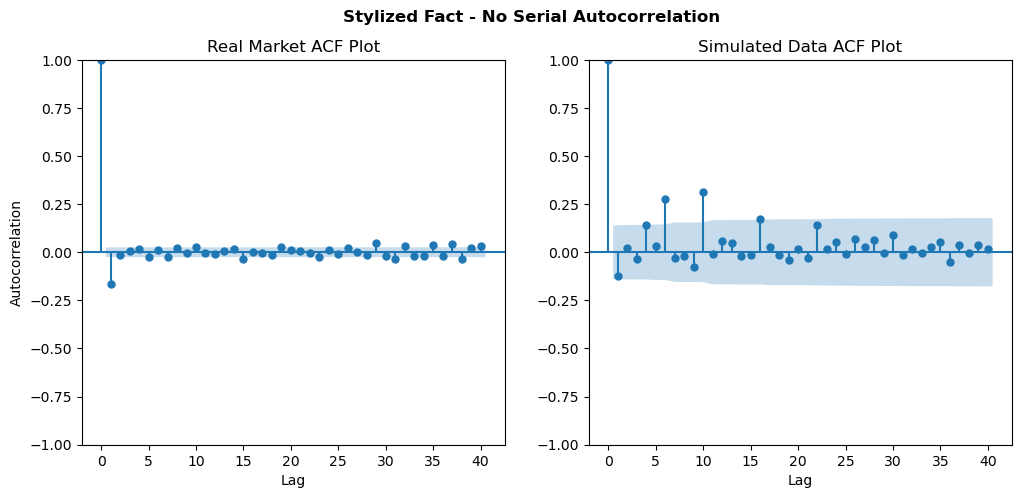

In [29]:
from statsmodels.graphics.tsaplots import plot_acf


return_data = yahoo_df['return'].dropna()
simulated_return_data = price_df['return_mid_price'].dropna()

# Create ACF plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Stylized Fact - No Serial Autocorrelation', fontweight = 'bold', fontsize = 12) # set title
plot_acf(return_data, ax = ax1, lags = 40)  # Adjust lags as needed
plot_acf(simulated_return_data, ax = ax2, lags = 40)  # Adjust lags as needed

ax1.set_title('Real Market ACF Plot')
ax2.set_title('Simulated Data ACF Plot')
ax1.set_xlabel('Lag')
ax2.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
plt.show()

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with one row and one column
fig = make_subplots(rows=1, cols=2, specs=[[{'secondary_y': True}, {'secondary_y': True}]], subplot_titles = ['Real Market Data', 'Simulation Result'])

# Define your traces
daily_price_line = go.Scatter(x = merge_df.index, y = merge_df['Close'], name = 'Monthly Spot Rate')
interest_rate_diff_line = go.Scatter(x = merge_df.index, y = merge_df['interest_rate_diff'], name = 'Interest Rate Diff', line = dict(color = ' red'))

simulated_price_line = go.Scatter(x = price_df['time_steps'], y = price_df['Mid Price'], name = 'Simulated Mid Price', line = dict(color = 'black'))
simulated_interest_rate_diff_line = go.Scatter(x = price_df['time_steps'], y = price_df['interest_rate_diff'], name = 'Simulated Interest Rate Difference')

# Add trace1 to the subplot
fig.add_trace(daily_price_line, col = 1, row = 1)
fig.add_trace(interest_rate_diff_line, secondary_y=True, col = 1, row = 1)

fig.add_trace(simulated_price_line, col = 2, row = 1)
fig.add_trace(simulated_interest_rate_diff_line, secondary_y=True, col = 2, row = 1)

fig.update_layout(template = temp,
                  title = 'Stylized Fact - Interest Rate & Spot Rate',
                  hovermode = 'closest',
                  margin = dict(l = 40, r = 40, t = 60, b = 40),
                  height = 500, 
                  width = 1200, 
                  showlegend = True,
                  xaxis = dict(tickfont=dict(size=10)),  
                  yaxis = dict(side = "left", tickfont = dict(size=10)),
                  xaxis_showgrid = False, 
                  legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation="h"))

# Show the figure
fig.show()

In [71]:
resample_price_df_1 = price_df.groupby(price_df.index // 5).last()
resample_price_df_2 = price_df.groupby(price_df.index // 10).last()


resample_price_df_1['return_mid_price'] = np.log(resample_price_df_1['Mid Price']).diff()
resample_price_df_2['return_mid_price'] = np.log(resample_price_df_2['Mid Price']).diff()


monthly_df = yahoo_df.to_period('M').groupby('Date').last()
yearly_df = yahoo_df.to_period('Y').groupby('Date').last()

monthly_df['return'] = np.log(monthly_df['Close']).diff()
yearly_df['return'] = np.log(yearly_df['Close']).diff()


fig = make_subplots(rows=2, cols=3, subplot_titles = ['Small Time Steps', 'Medium Time Steps', 'Large Time Steps', 'Daily', 'Monthly', 'Yearly'])

simulated_daily_return_histogram = go.Histogram(x = price_df['return_mid_price'], nbinsx = 100,  histnorm = 'density', marker_color = 'blue')
simulated_monthly_return_histogram = go.Histogram(x = resample_price_df_1['return_mid_price'], nbinsx = 20,  histnorm = 'density', marker_color = 'blue')
simulated_yearly_return_histogram = go.Histogram(x = resample_price_df_2['return_mid_price'], nbinsx = 10,  histnorm = 'density', marker_color = 'blue')

daily_return_histogram = go.Histogram(x = yahoo_df['return'], nbinsx = 300,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')
monthly_return_histogram = go.Histogram(x = monthly_df['return'], nbinsx = 30,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')
yearly_return_histogram = go.Histogram(x = yearly_df['return'], nbinsx = 6,  histnorm = 'density', marker_color = 'rgba(0, 128, 0, 0.6)')


fig.add_trace(simulated_daily_return_histogram, row = 1, col = 1)
fig.add_trace(simulated_monthly_return_histogram, row = 1, col = 2)
fig.add_trace(simulated_yearly_return_histogram, row = 1, col = 3)


fig.add_trace(daily_return_histogram, row = 2, col = 1)
fig.add_trace(monthly_return_histogram, row = 2, col = 2)
fig.add_trace(yearly_return_histogram, row = 2, col = 3)


fig.update_layout(template = temp,
                       title = 'Stylized Fact - Aggregational Gaussianity',
                       hovermode = 'closest',
                       bargap = 0.05,
                       margin = dict(l = 40, r = 40, t = 80, b = 40),
                       height = 600, 
                       width = 1000, 
                       showlegend = False,
                       xaxis = dict(tickfont=dict(size=10)),  
                       xaxis2 = dict(tickfont=dict(size=10)),  
                       yaxis = dict(side = "left", tickfont = dict(size=10)),
                       xaxis_showgrid = False, 
                       legend = dict(yanchor = "bottom", y = 0.95, xanchor = "left", x = 0.01,  orientation = "h"))

fig.show()